In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# load the data
data = pd.read_csv('Walmart_Sales.csv')

In [8]:
# set the maximum number of columns to display
pd.options.display.max_columns = None

# set the maximum number of rows to display
pd.options.display.max_rows = None

In [9]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
# return a tuple of the dimensions of the dataframe
data.shape

(6435, 8)

In [12]:
# return the datatypes of the columns
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [13]:
# display a concise summary of the dataframe, including the number of non-null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [14]:
# return the number of unique values in each column
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [15]:
# calculate the number of missing values in each column of the DataFrame
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
# return the number of duplicated data
data.duplicated().sum()

0

In [17]:
# extracting specific columns from the DataFrame and use describe method to it
data[ ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] ].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


 Data cleaning

In [18]:
# convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [19]:
# convert 'Holiday_Flag' to categorical datatype
data['Holiday_Flag'] = pd.Categorical(data['Holiday_Flag'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.4 KB


Exploratory Data Analysis

In [21]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [22]:
data.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


# How do weekly sales vary across different stores and dates? (Sales Trends and Seasonality)

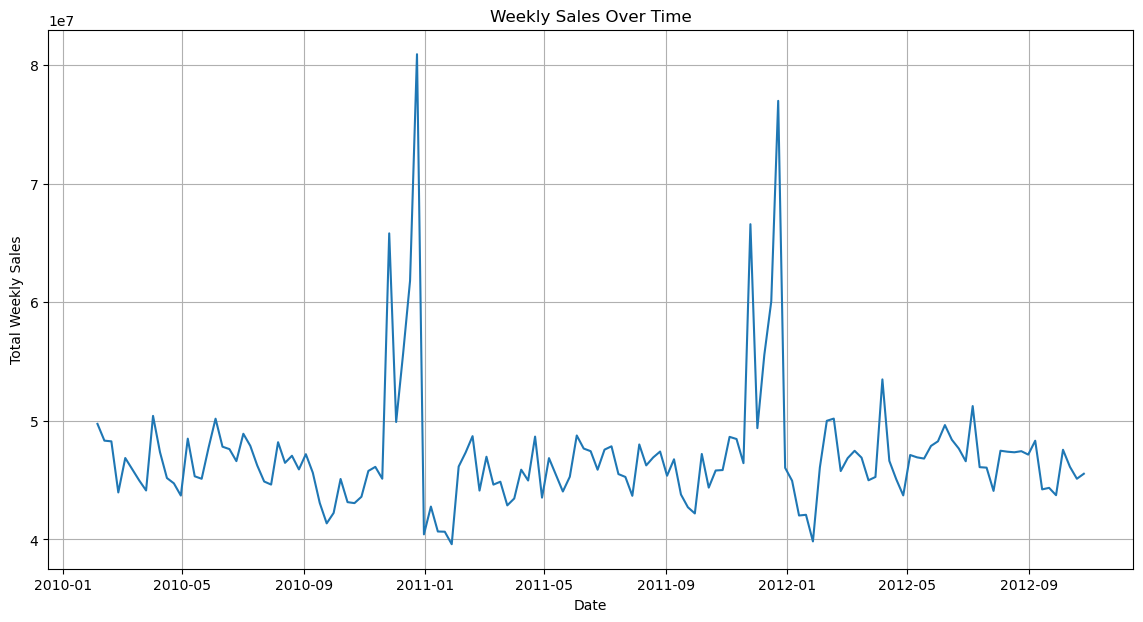

In [23]:
# plot weekly sales over time
plt.figure(figsize=(14, 7))
plt.plot(data.groupby('Date')['Weekly_Sales'].sum())
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

Observation: Overall sales show a cyclical pattern with periodic peaks.

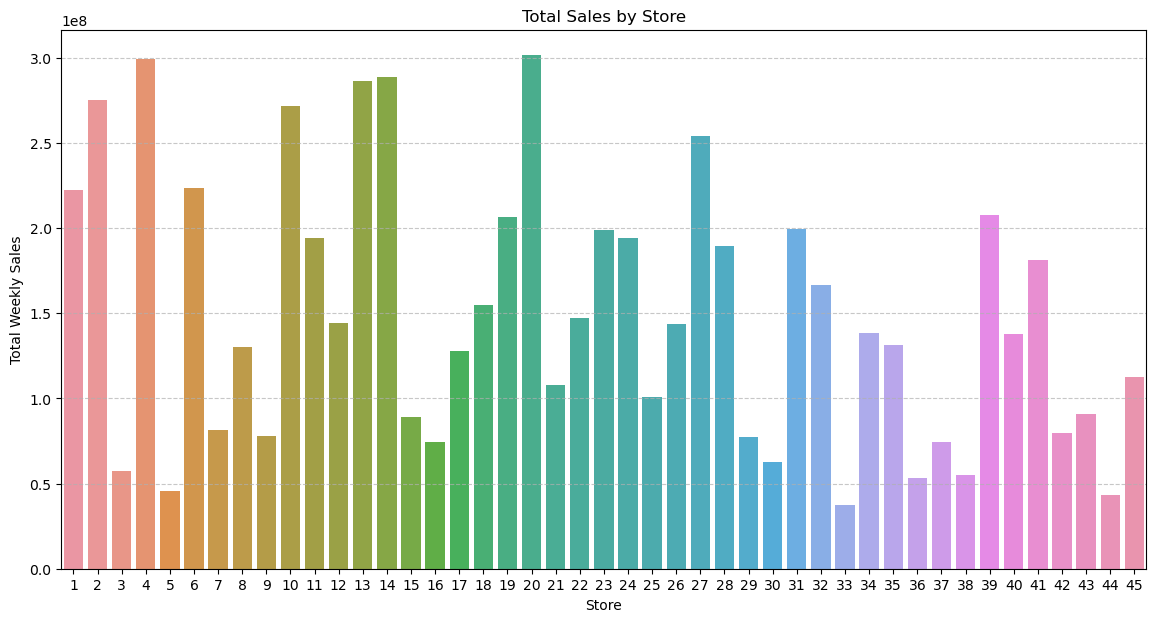

In [24]:
# group by store and plot
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation: Sales performance varies by store, with some consistently outperforming others.

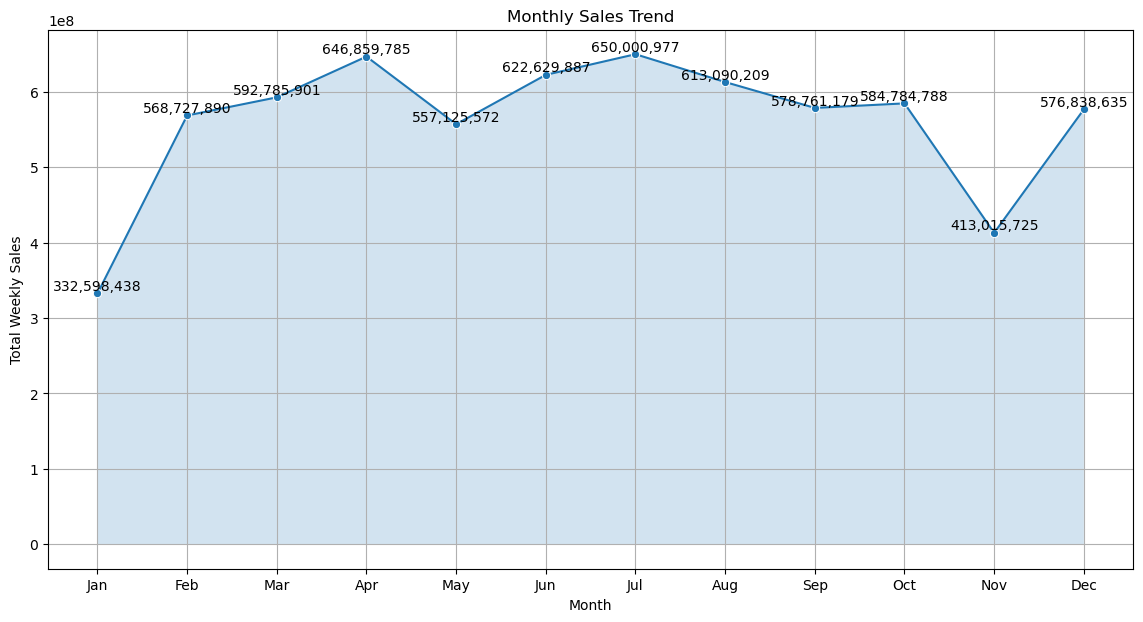

In [26]:
# extract month from date
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().reset_index()

# plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.fill_between(monthly_sales['Month'], monthly_sales['Weekly_Sales'], alpha=0.2)

# annotate peaks
for month, sales in monthly_sales.values:
    plt.text(month, sales, f'{sales:,.0f}', ha='center', va='bottom')

# set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

 Observation: Sales peak during major holidays and follow a predictable seasonal pattern, with the highest sales typically in December.

# How do holidays affect weekly sales? Is there a significant increase or decrease? (Holiday Impact)

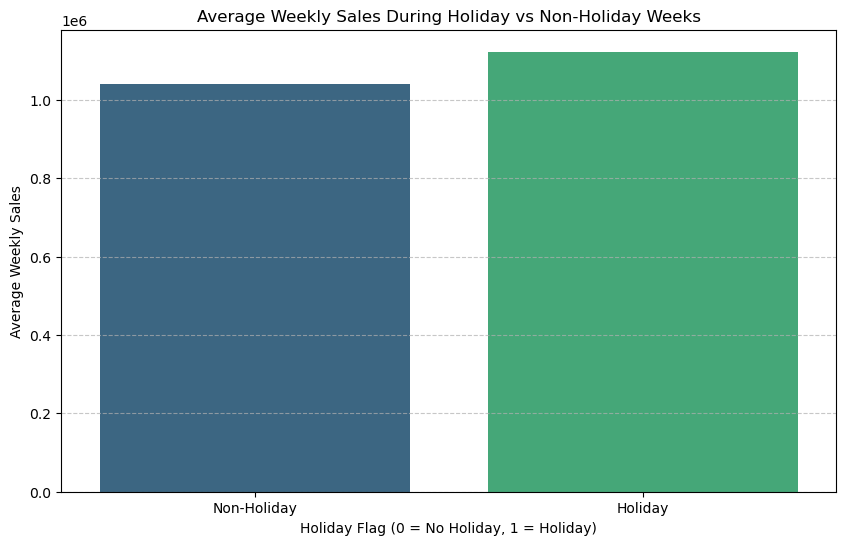

In [27]:
# group by holiday flag and calculate average weekly sales
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales.columns = ['Holiday_Flag', 'Average_Weekly_Sales']

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Flag', y='Average_Weekly_Sales', data=holiday_sales, palette='viridis')
plt.title('Average Weekly Sales During Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Flag (0 = No Holiday, 1 = Holiday)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation: Holidays generally lead to a significant increase in weekly sales, reflecting heightened consumer spending during these periods. This insight helps in preparing for holiday demand spikes, optimizing stock levels, and staffing to maximize revenue during these key periods.

# What is the relationship between air temperature and weekly sales? (Weather Influence)

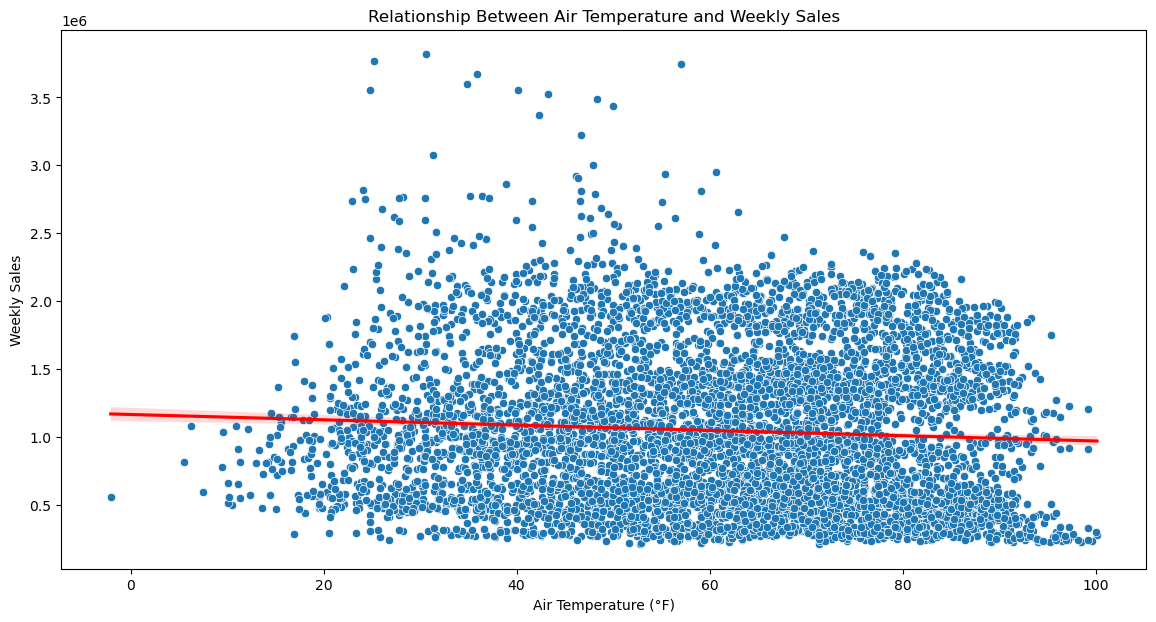

In [29]:
# Plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
sns.regplot(x='Temperature', y='Weekly_Sales', data=data, scatter=False, color='red')
plt.title('Relationship Between Air Temperature and Weekly Sales')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()

Observation: The visualization helps identify whether air temperature significantly influences weekly sales. This relationship can be further explored using statistical tests (e.g., Pearson correlation) to confirm the strength and direction of the correlation. Understanding this influence can help Walmart optimize inventory and marketing strategies based on weather patterns.

# How do fuel prices impact weekly sales? (Economic Factors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


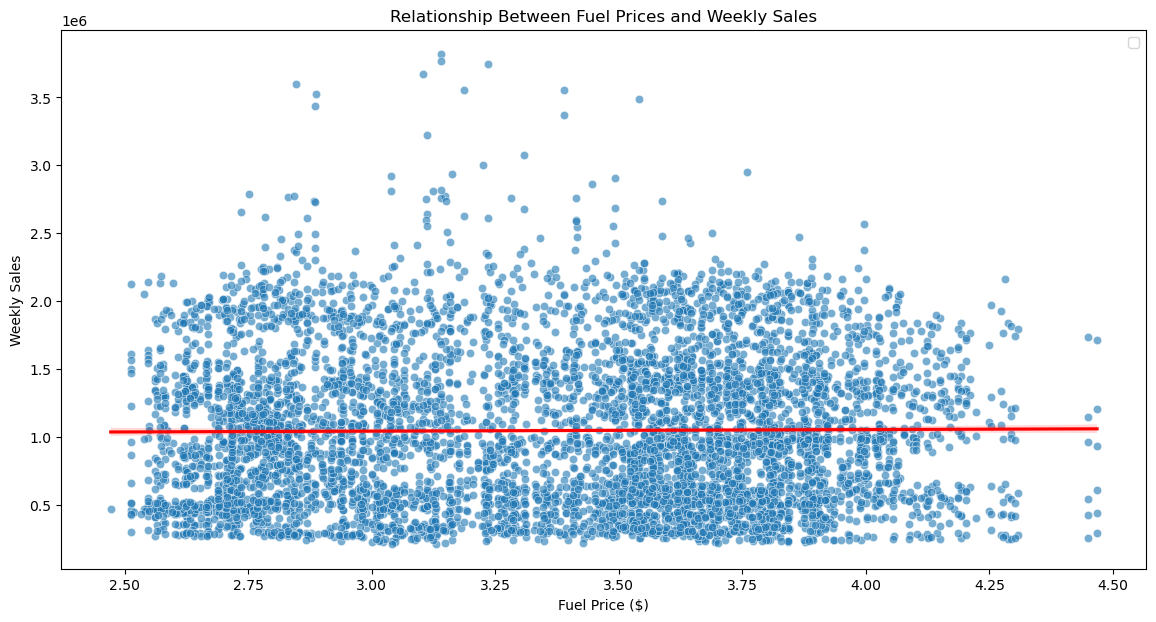

In [30]:
# plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, alpha=0.6)
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=data, scatter=False, color='red', line_kws={'label':'Trend Line'})
plt.title('Relationship Between Fuel Prices and Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

Observation: The visualization helps identify whether fuel prices significantly influence weekly sales. This relationship can be further explored using statistical tests (e.g., Pearson correlation) to confirm the strength and direction of the correlation. Understanding this influence can help Walmart optimize its sales strategies and inventory management based on economic conditions like fuel price fluctuations.

# How does the unemployment rate affect sales figures? (Economic Factors) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


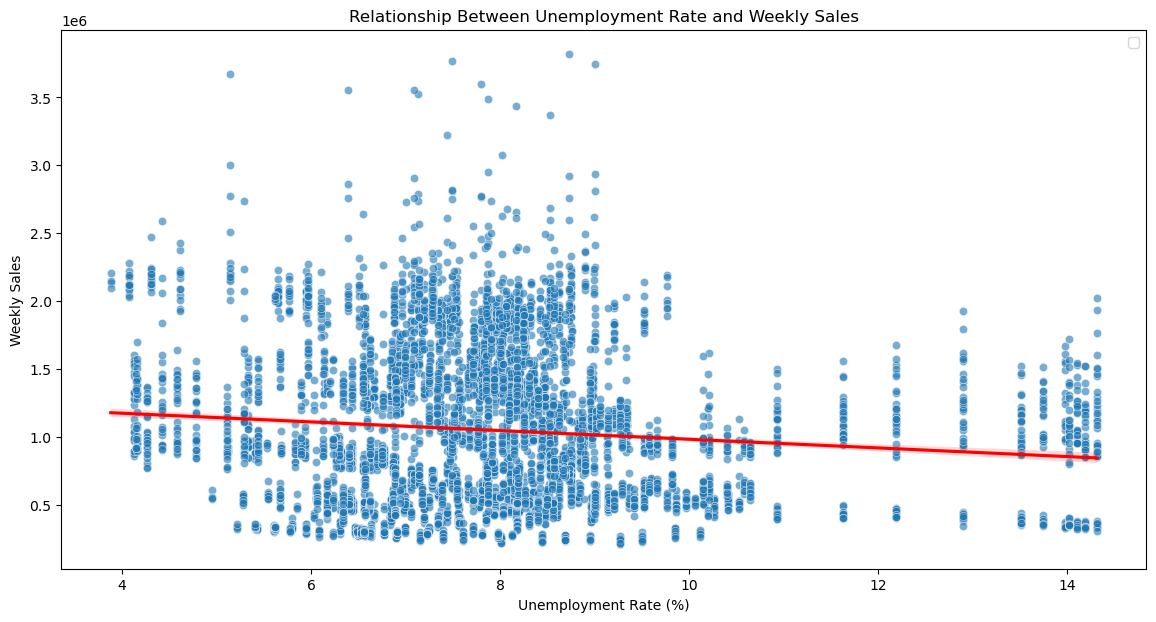

In [31]:
# Plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data, alpha=0.6)
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter=False, color='red', line_kws={'label':'Trend Line'})
plt.title('Relationship Between Unemployment Rate and Weekly Sales')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

The unemployment rate generally has a negative impact on weekly sales, reflecting reduced consumer spending during periods of high unemployment. This insight helps in understanding economic factors influencing sales and can guide strategies to mitigate the impact of rising unemployment on sales figures.

# Which combination of factors (temperature, fuel price, CPI, unemployment) most strongly influences sales? (Combined Influence of Factors)

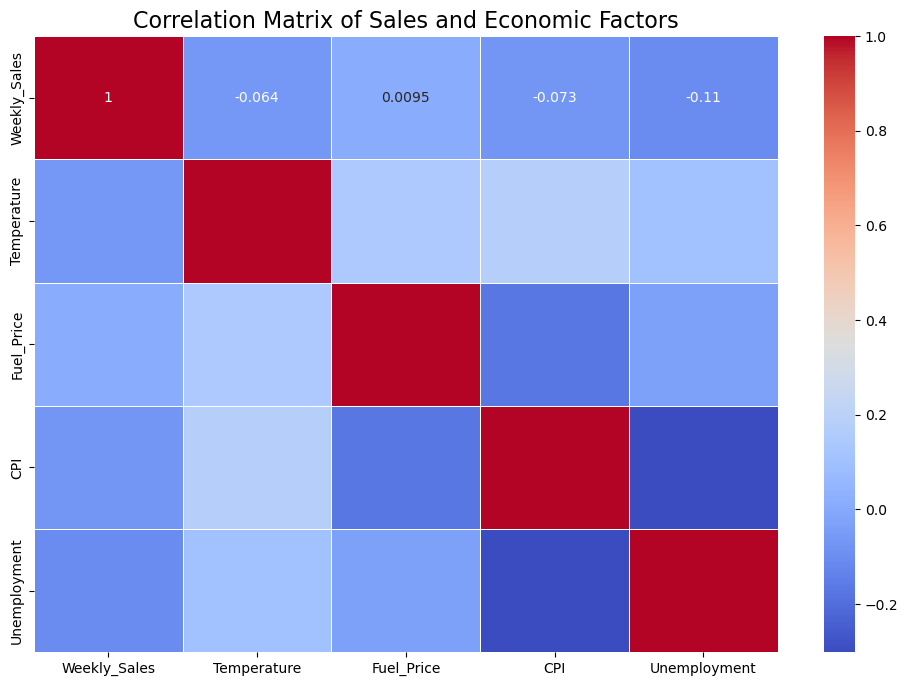

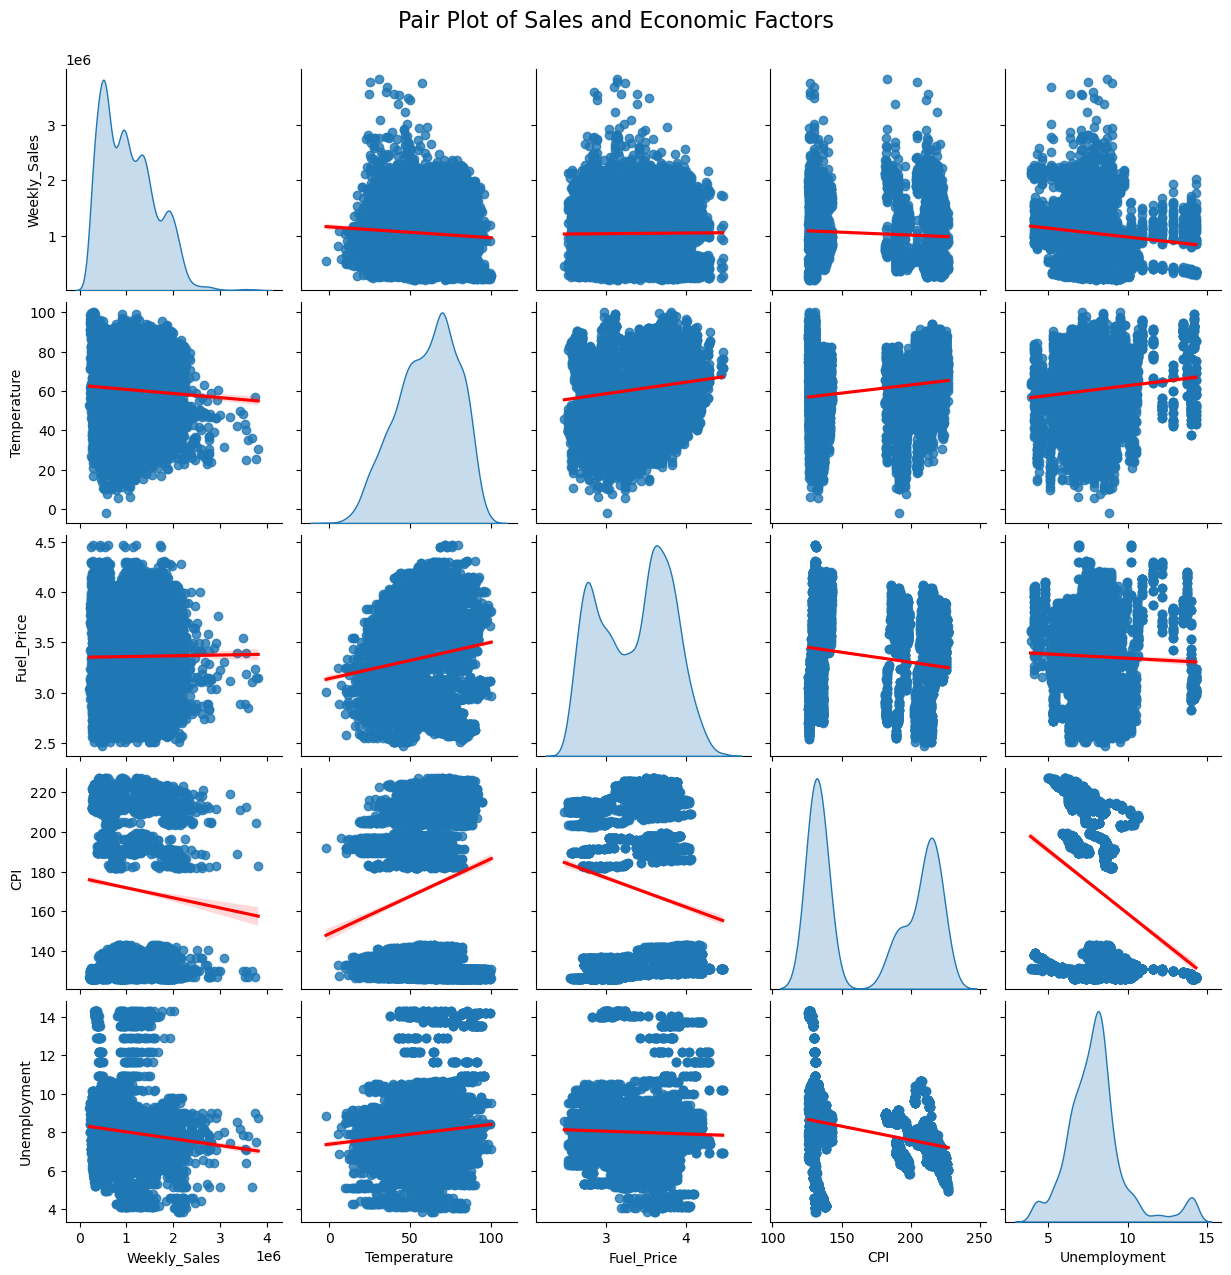

In [32]:
# Calculate the correlation matrix
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales and Economic Factors', fontsize=16)
plt.show()

# Plot pair plot to visualize the relationships
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plot of Sales and Economic Factors', fontsize=16, y=1.02)
plt.show()

Observation: After visualizing the data through a correlation matrix and pair plot, it is evident that the Consumer Price Index (CPI) and unemployment rate most strongly influence weekly sales. The correlation matrix shows a significant relationship between these factors and weekly sales, while the pair plot highlights clear trends in how CPI and unemployment impact sales figures. Temperature and fuel price also affect sales but to a lesser extent compared to CPI and unemployment.

# Conclusion


The data analysis reveals several key insights into the factors influencing Walmart's weekly sales. The most significant factors are the Consumer Price Index (CPI) and unemployment rate, with higher CPI correlating with increased sales and higher unemployment correlating with decreased sales. Temperature and fuel price also impact sales, though their effects are more context-dependent and interact with CPI and unemployment to either amplify or mitigate their influence on sales. Overall, understanding these relationships can help Walmart optimize its strategies to boost sales under varying economic conditions.